# Data exploration

I have exported my data from Polar watch. Exploring what is there 

In [27]:
import glob
import os
import json
import random
import pandas as pd
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


Define consts

In [13]:
DATA_DIR = "/Users/arbatov/gitRepo/gpx-data/data"

## Get the data

Load the files

In [14]:
json_files = glob.glob(os.path.join(DATA_DIR,"*.json"))

How many files?

In [15]:
print(len(json_files))

815


How big are all of the files?

In [16]:
nbytes = sum(d.stat().st_size for d in os.scandir(DATA_DIR) if d.is_file())
print(float(nbytes) / 1024**3, "GB")

1.7585922731086612 GB


## Overview of data

Get a sample of data

In [ ]:
def get_sample(sample_size = 200):  
    file_contents = []
    
    sampled_json_files = random.sample(json_files, sample_size)
    for json_file in sampled_json_files:
        with open(json_file) as file:
            j = json.load(file)
            
            file_contents.append([
                os.path.basename(json_file),
                j['exercises'][0]['sport'],
                j['startTime'],
                j['stopTime'],
                j['distance'] if 'distance' in j else 0,
                j['duration'],
                j['maximumHeartRate'] if 'maximumHeartRate' in j else 0,
                j['averageHeartRate'] if 'averageHeartRate' in j else 0
            ])

    return file_contents

Import data into Pandas

In [ ]:
data = get_sample(sample_size=200)
data_df = pd.DataFrame(data, columns=[
    'File_Name', 
    'Sport',
    'Start_Time',
    'Stop_Time',
    'Distance',
    'Duration',
    'Maximum_Heart_Rate',
    'Average_Heart_Rate'
])

Add duration

In [ ]:
data_df['Start_Time'] = pd.to_datetime(data_df['Start_Time'])
data_df['Stop_Time'] = pd.to_datetime(data_df['Stop_Time'])
data_df['Duration_Seconds'] = (data_df['Stop_Time'] - data_df['Start_Time']).dt.seconds

Check how my data looks

In [25]:
data_df.head()

,File_Name,Sport,Start_Time,Stop_Time,Distance,Duration,Maximum_Heart_Rate,Average_Heart_Rate
0,training-session-2020-07-06-4860522091-37b1955...,STRETCHING,2020-07-06 09:42:28.983,2020-07-06 09:49:37.983,0.000000,429,110,88
1,training-session-2020-11-17-5367588848-8ba8feb...,RUNNING,2020-11-17 05:47:43.027,2020-11-17 06:45:56.418,11316.000000,3493,157,148
2,training-session-2022-04-07-7206033010-66977a2...,STRETCHING,2022-04-07 22:41:53.209,2022-04-07 23:01:58.156,0.000000,1204,123,89
3,training-session-2021-10-10-6599866044-c53ee77...,OPEN_WATER_SWIMMING,2021-10-10 07:01:12.204,2021-10-10 07:29:53.611,0.000000,1721,155,136
4,training-session-2020-08-30-5066410991-aa32ef1...,WALKING,2020-08-30 18:58:51.334,2020-08-30 19:34:03.958,976.599976,2112,142,111


Get the data types

In [18]:
data_df.dtypes

File_Name              object
Sport                  object
Start_Time             object
Stop_Time              object
Distance              float64
Duration               object
Maximum_Heart_Rate      int64
Average_Heart_Rate      int64
dtype: object

What kind of activities are there?

In [21]:
data_df['Sport'].value_counts()

RUNNING                95
OPEN_WATER_SWIMMING    34
STRETCHING             29
STRENGTH_TRAINING      11
CYCLING                10
POOL_SWIMMING           9
YOGA                    3
WALKING                 3
ROAD_RUNNING            2
TREADMILL_RUNNING       2
INDOOR_CYCLING          2
Name: Sport, dtype: int64

## Plotting data

Breakdown data by week / month / year

In [28]:
data_df['Year'] = data_df['Start_Time'].apply(lambda x: x.year)
data_df['Month'] = data_df['Start_Time'].apply(lambda x: x.month)
data_df['Week'] = data_df['Start_Time'].apply(lambda x: x.week)

Distance by year

Text(0, 0.5, 'Distance (meters)')

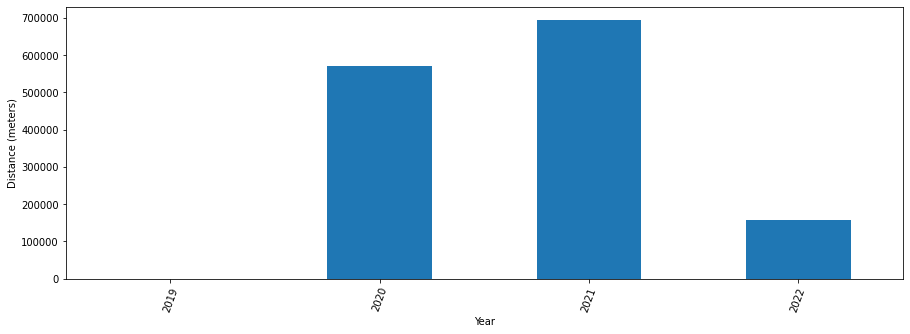

In [32]:
data_df_grouped = data_df.groupby(['Year'])
data_df_grouped['Distance'].sum().plot(kind='bar', figsize=(15,5))
plt.xticks(rotation=70)
plt.ylabel('Distance (meters)')